### Data Science Interviews Group Study (Spring 2017)
- Brian Goodness
- Assignment 3: Employee Retention

# Objectives:

- Predict when employees are going to quit by understanding the main drivers of employee churn

- Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13

    - Create a table with 3 columns: **`day, employee_headcount, company_id`**

- What are the main factors that drive employee churn? Do they make sense? Explain your findings

#### Question: If you could add to this data set just one variable that could help explain employee churn, what would that be?
- Response: # of hours that employee worked each day (e.g., based on computer log-in/logout timestamps)

In [1]:
import pandas as pd
#import statsmodels.api as sm
import pylab as pl
import numpy as np

### helper functions

In [2]:
# tabulate method
def tab(frame, field):
    result = pd.DataFrame(frame[field].value_counts())
    result['percent'] = result[field]/result[field].sum()*100
    return result

In [3]:
# crosstab method (to include percentages)
def crosstab_pcts(frame, row, column):
    ctab = pd.crosstab(frame[row], frame[column])
    for field in ctab.columns:
        ctab['%s_pct' % field] = ctab[field]/ctab[field].sum()*100
    return ctab

### load data; inspect

In [4]:
data = pd.read_csv('employee_retention_data.csv')
data.quit_date.fillna('2015/12/13', inplace=True) # replace NaN with last date in dataset
data.join_date = pd.to_datetime(data.join_date)
data.quit_date = pd.to_datetime(data.quit_date)

In [5]:
### inspect data
print('Dataset Size: %s' % len(data))
print('\nMin Date: %s, Max Date: %s' % (np.min(data.join_date), np.max(data.join_date)))
print('\nCompanies: %s' % tab(data, 'company_id'))
print('\nDepartments: %s' % tab(data, 'dept'))
data.head(10)

Dataset Size: 24702

Min Date: 2011-01-24 00:00:00, Max Date: 2015-12-10 00:00:00

Companies:     company_id    percent
1         8486  34.353494
2         4222  17.091733
3         2749  11.128654
4         2062   8.347502
5         1755   7.104688
6         1291   5.226297
7         1224   4.955064
8         1047   4.238523
9          961   3.890373
10         865   3.501741
12          24   0.097158
11          16   0.064772

Departments:                   dept    percent
customer_service  9180  37.162983
engineer          4613  18.674601
data_science      3190  12.913934
sales             3172  12.841066
marketing         3167  12.820824
design            1380   5.586592


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
6,88600.0,4,customer_service,21,107000.0,2013-10-21,2015-12-13
7,716309.0,2,customer_service,4,30000.0,2014-03-05,2015-12-13
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23
9,504159.0,1,sales,7,104000.0,2012-06-12,2015-12-13


In [6]:
# create datelist iterator for min/max dates
import datetime
start_date = datetime.datetime.strptime('2011/01/24', '%Y/%m/%d')
end_date = datetime.datetime.strptime('2015/12/13', '%Y/%m/%d')
numdays = (end_date - start_date).days
date_list = [start_date + datetime.timedelta(days=x) for x in range(0, numdays+1)]

In [7]:
# create date range dummies based on employee's join/quit dates
import time
t0 = time.time()
for date in date_list:
    data[date] = ((data.join_date <= date) & (data.quit_date >= date)).map(lambda x: 1 if x else 0)
print('time elapsed: %s' % (time.time() - t0))

time elapsed: 31.775623321533203


In [8]:
# inspect new columns
data.sort_values(['join_date','quit_date']).head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,2011-01-24 00:00:00,2011-01-25 00:00:00,2011-01-26 00:00:00,...,2015-12-04 00:00:00,2015-12-05 00:00:00,2015-12-06 00:00:00,2015-12-07 00:00:00,2015-12-08 00:00:00,2015-12-09 00:00:00,2015-12-10 00:00:00,2015-12-11 00:00:00,2015-12-12 00:00:00,2015-12-13 00:00:00
15523,581263.0,1,sales,5,118000.0,2011-01-24,2011-10-21,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7848,149299.0,5,marketing,18,147000.0,2011-01-24,2011-12-16,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10853,18837.0,4,customer_service,15,98000.0,2011-01-24,2011-12-16,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19558,527591.0,2,engineer,11,178000.0,2011-01-24,2011-12-16,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2402,490535.0,8,data_science,7,163000.0,2011-01-24,2011-12-23,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# calculate employee headcounts in each company, by day
employee_counts = data.groupby('company_id').sum()
del employee_counts['employee_id']
del employee_counts['seniority']
del employee_counts['salary']

# pivot table
employee_counts = employee_counts.reset_index()
employee_counts = pd.melt(employee_counts, id_vars=['company_id'], var_name='date', value_name='employee_count')
employee_counts.head()

,company_id,date,employee_count
0,1,2011-01-24,25
1,2,2011-01-24,17
2,3,2011-01-24,9
3,4,2011-01-24,12
4,5,2011-01-24,5


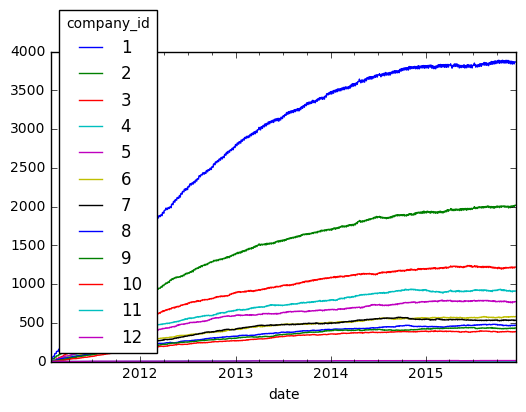

In [10]:
# plot employee counts over time, across companies
import matplotlib.pyplot as plt
%matplotlib inline
employee_counts.pivot('date', 'company_id', 'employee_count').plot()

/home/briangoodness/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


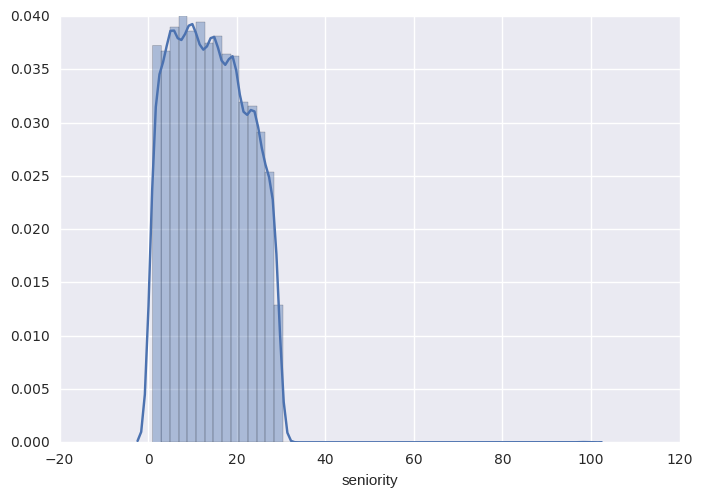

In [11]:
# plot histogram of seniority
import seaborn as sns
dp = sns.distplot(data['seniority'])

/home/briangoodness/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


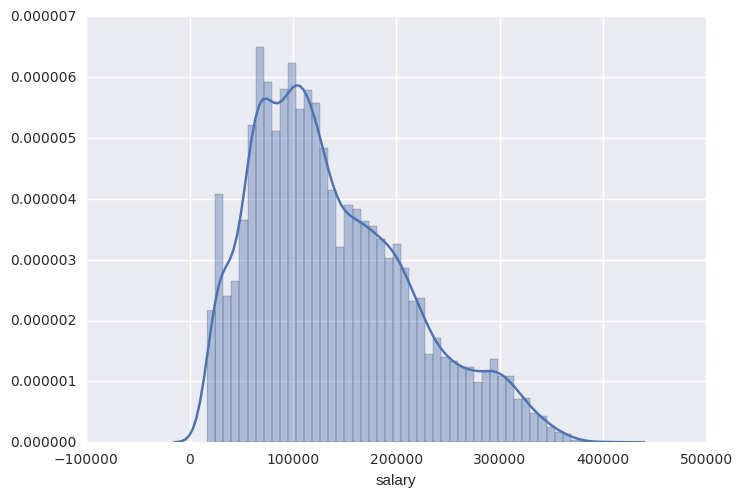

In [12]:
# plot histogram of salary
dp = sns.distplot(data['salary'])